In [4]:
import torch
import numpy as np
import sys
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import json
import collections
import matplotlib.pyplot as plt

In [4]:
# cjk = json.load(open('cjk.json'))
# CN_CHARSET = cjk['gb2312']

In [2]:
# cjk = json.load(open('cjk.json'))
# CN_CHARSET = cjk['gbk']

In [5]:
codes = []
try:
    for head in range(0xb0, 0xd8):
        for body in range(0xa1, 0xff):
            val = f'{head:x} {body:x}'
            codes.append(bytes.fromhex(val).decode('gb2312'))
except:
    pass

len(codes)

3755

In [6]:
# font_name = 'msyh'
# msyh = ImageFont.truetype(font_name+'.ttf', size=60)

font_name = 'kai'
kai = ImageFont.truetype(font_name+'.ttf', size=120)

font_name = 'fzjl'
fzjl = ImageFont.truetype(font_name+'.ttf', size=120)

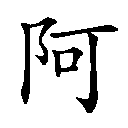

In [7]:
img = Image.new("1", (128, 128), (1))
draw = ImageDraw.Draw(img)
draw.text((2, -20), codes[1], (0), font=kai)
img

1000
2000
3000


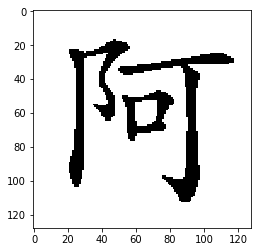

In [4]:
right = np.ones([len(codes), 128, 128], dtype=np.uint0)

for i, ch in enumerate(codes):
    try:
        img = Image.new("1", (128, 128), (1))
        draw = ImageDraw.Draw(img)
        draw.text((2, -20), ch, (0), font=kai)
        #draw.text((1, 0), ch, (0), font=msyh)
        #img.save('../data/{}/{}.jpg'.format(font_name, i))
        right[i] = np.array(img)
        if (i+1) % 1000 == 0:
            print(i+1)
    except:
        pass
    
plt.imshow(right[1], cmap='gray')
plt.show()

1000
2000
3000


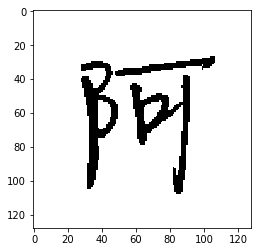

In [5]:
left = np.ones([len(codes), 128, 128], dtype=np.uint0)

for i, ch in enumerate(codes):
    try:
        img = Image.new("1", (128, 128), (1))
        draw = ImageDraw.Draw(img)
        #draw.text((1, -10), ch, (0), font=fzjl)
        draw.text((2, 0), ch, (0), font=fzjl)
        #img.save('../data/{}/{}.jpg'.format(font_name, i))
        left[i] = np.array(img)
        if (i+1) % 1000 == 0:
            print(i+1)
    except:
        pass
    
plt.imshow(left[1], cmap='gray')
plt.show()

In [6]:
left.tofile('../data/{}_{}.np'.format('fzjl', 128))
right.tofile('../data/{}_{}.np'.format('kai', 128))

In [34]:
# np.random.seed(0)
# indices = np.random.permutation(len(left))


# #source_font = source_font[indices]
# #target_font = target_font[indices]

In [35]:
len(left)

3755